In [75]:
import cv2
import os
from matplotlib import pyplot as plt
import random
import pdb
import numpy as np
from scipy import ndimage
from six.moves import cPickle as pickle
import hashlib

 Helpful sources: http://mlwak.blogspot.com/2016/06/udacity-assignment-1-not-mnist.html

### 1: load data and show some images

In [52]:
# Returns data in format { 'folders': {}, 'image_paths': [] }
def load_image_paths_from_folder(folder):
    print("Getting image paths from {}".format(folder))
    result = { 'folders': {}, 'image_paths': [] }
    for name in os.listdir(folder):
        is_folder = os.path.isdir(os.path.join(folder, name))
        if is_folder:
            subfolder = os.path.join(folder, name)
            result['folders'][subfolder] = load_image_paths_from_folder(subfolder)
        else:
            image_path = os.path.join(folder, name)
            result['image_paths'].append(image_path)
    return result


In [53]:
def plot_samples(image_paths, sample_size, name):
    figure = plt.figure()
    figure.suptitle(name)
    folders = image_paths['folders']
    for folder_name, folder in folders.items():
        image_path_samples = random.sample(folder['image_paths'], sample_size)
        for image_path in image_path_samples:
            subplot = figure.add_subplot(
                sample_size,
                len(folders),
                list(folders).index(folder_name) * sample_size + image_path_samples.index(image_path) + 1
            )
            image = cv2.imread(os.path.join(image_path))
            subplot.imshow(image)
            subplot.set_axis_off()
    plt.show()

Getting image paths from ../data/notMNIST_large
Getting image paths from ../data/notMNIST_large/B
Getting image paths from ../data/notMNIST_large/F
Getting image paths from ../data/notMNIST_large/J
Getting image paths from ../data/notMNIST_large/G
Getting image paths from ../data/notMNIST_large/C
Getting image paths from ../data/notMNIST_large/E
Getting image paths from ../data/notMNIST_large/D
Getting image paths from ../data/notMNIST_large/H
Getting image paths from ../data/notMNIST_large/A
Getting image paths from ../data/notMNIST_large/I
Getting image paths from ../data/notMNIST_small
Getting image paths from ../data/notMNIST_small/B
Getting image paths from ../data/notMNIST_small/F
Getting image paths from ../data/notMNIST_small/J
Getting image paths from ../data/notMNIST_small/G
Getting image paths from ../data/notMNIST_small/C
Getting image paths from ../data/notMNIST_small/E
Getting image paths from ../data/notMNIST_small/D
Getting image paths from ../data/notMNIST_small/H
Gett

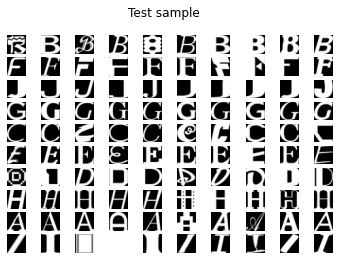

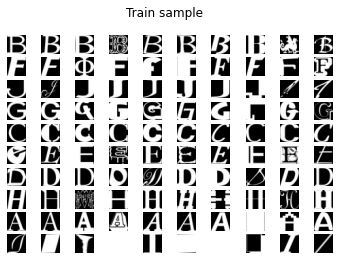

In [54]:
test_sample_folder = '../data/notMNIST_small'
train_sample_folder = '../data/notMNIST_large'


train_sample = load_image_paths_from_folder(train_sample_folder)
test_sample = load_image_paths_from_folder(test_sample_folder)

plot_samples(test_sample, 10, 'Test sample')
plot_samples(train_sample, 10, 'Train sample')


In [55]:
# # 2: check if samples are balanced

image_size = 28 # Pixel width and height.
pixel_depth = 255.0 # Number of levels per pixel.

# We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values,
# normalized to have approximately zero mean and standard deviation ~0.5
# to make training easier down the road.

In [56]:
def load_letter(folder, min_num_images):
    """Load the data for a single letter label."""
    """image_files is an array of all the filenames"""
    image_files = os.listdir(folder)
    """dataset is an array of length being the total number of images, and each image is 28x28"""
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
    print(folder)
    num_images = 0
    for image in image_files:
        image_file = os.path.join(folder, image)
        try:
            """this is the normalization step - the formula is [value-(255/2)]/255"""
            image_data = (ndimage.imread(image_file).astype(float) - pixel_depth / 2) / pixel_depth
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            """after the normalization, stick the normalized image
               into the dataset array at the nth position"""
            dataset[num_images, :, :] = image_data
            num_images = num_images + 1
        except IOError as e:
            print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')

    dataset = dataset[0:num_images, :, :]
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' %
                        (num_images, min_num_images))

    print('Full dataset tensor:', dataset.shape)
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))
    return dataset

In [57]:
# Pickle is used for serializing and de-serializing Python object structures,
# also called marshalling or flattening.
def pickle_dataset(data_folders, min_num_images_per_class):
    dataset_names = []
    for folder in data_folders:
        set_filename = folder + '.pickle'
        dataset_names.append(set_filename)
        if os.path.exists(set_filename):
            # You may override by setting force=True.
            print('%s already present - Skipping pickling.' % set_filename)
        else:
            print('Pickling %s.' % set_filename)
            dataset = load_letter(folder, min_num_images_per_class)
            try:
                with open(set_filename, 'wb') as f:
                    pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
            except Exception as e:
                print('Unable to save data to', set_filename, ':', e)

    return dataset_names


In [58]:
train_datasets = pickle_dataset(train_sample['folders'], 45000)
test_datasets = pickle_dataset(test_sample['folders'], 1800)


../data/notMNIST_large/B.pickle already present - Skipping pickling.
../data/notMNIST_large/F.pickle already present - Skipping pickling.
../data/notMNIST_large/J.pickle already present - Skipping pickling.
../data/notMNIST_large/G.pickle already present - Skipping pickling.
../data/notMNIST_large/C.pickle already present - Skipping pickling.
../data/notMNIST_large/E.pickle already present - Skipping pickling.
../data/notMNIST_large/D.pickle already present - Skipping pickling.
../data/notMNIST_large/H.pickle already present - Skipping pickling.
../data/notMNIST_large/A.pickle already present - Skipping pickling.
../data/notMNIST_large/I.pickle already present - Skipping pickling.
../data/notMNIST_small/B.pickle already present - Skipping pickling.
../data/notMNIST_small/F.pickle already present - Skipping pickling.
../data/notMNIST_small/J.pickle already present - Skipping pickling.
../data/notMNIST_small/G.pickle already present - Skipping pickling.
../data/notMNIST_small/C.pickle al

In [59]:
def num_of_images(datasets):
    num = []

    for pickle_file in datasets:
        with open(pickle_file, 'rb') as f:
            data = pickle.load(f)
            print('Total images in', pickle_file, ':', len(data))
            num.append(len(data))

    return num

In [60]:
def balance_check(sizes):
    mean_val = mean(sizes)
    print('mean of # images :', mean_val)
    for i in sizes:
        if abs(i - mean_val) > 0.1 * mean_val:
            print("Too much or less images")
        else:
            print("Well balanced", i)

In [61]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

In [62]:
def generate_fake_label(sizes):
    labels = np.ndarray(sum(sizes), dtype=np.int32)
    start = 0
    end = 0
    for label, size in enumerate(sizes):
        start = end
        end += size
        for j in range(start, end):
            labels[j] = label
    return labels

In [63]:
def plot_balance(train_labels, test_labels):
    fig, ax = plt.subplots(1, 2)
    bins = np.arange(train_labels.min(), train_labels.max() + 2)
    ax[0].hist(train_labels, bins=bins)
    ax[0].set_xticks((bins[:-1] + bins[1:]) / 2, [chr(k) for k in range(ord("A"), ord("J") + 1)])
    ax[0].set_title("Training data")

    bins = np.arange(test_labels.min(), test_labels.max() + 2)
    ax[1].hist(test_labels, bins=bins)
    ax[1].set_xticks((bins[:-1] + bins[1:]) / 2, [chr(k) for k in range(ord("A"), ord("J") + 1)])
    ax[1].set_title("Test data")
    plt.show()

Total images in ../data/notMNIST_small/B.pickle : 1873
Total images in ../data/notMNIST_small/F.pickle : 1872
Total images in ../data/notMNIST_small/J.pickle : 1872
Total images in ../data/notMNIST_small/G.pickle : 1872
Total images in ../data/notMNIST_small/C.pickle : 1873
Total images in ../data/notMNIST_small/E.pickle : 1873
Total images in ../data/notMNIST_small/D.pickle : 1873
Total images in ../data/notMNIST_small/H.pickle : 1872
Total images in ../data/notMNIST_small/A.pickle : 1872
Total images in ../data/notMNIST_small/I.pickle : 1872
Total images in ../data/notMNIST_large/B.pickle : 52911
Total images in ../data/notMNIST_large/F.pickle : 52912
Total images in ../data/notMNIST_large/J.pickle : 52911
Total images in ../data/notMNIST_large/G.pickle : 52912
Total images in ../data/notMNIST_large/C.pickle : 52912
Total images in ../data/notMNIST_large/E.pickle : 52912
Total images in ../data/notMNIST_large/D.pickle : 52911
Total images in ../data/notMNIST_large/H.pickle : 52912
To

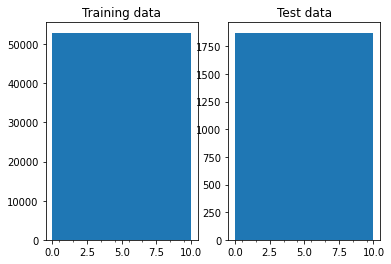

In [64]:
test_labels = generate_fake_label(num_of_images(test_datasets))
train_labels = generate_fake_label(num_of_images(train_datasets))

# Checking balance
balance_check(num_of_images(test_datasets))
balance_check(num_of_images(train_datasets))

plot_balance(train_labels=train_labels, test_labels=test_labels)


In [65]:
# 3: divide into train (200k images), valid (10k images), test (19k images) subsamples

In [66]:
# creates 2 blank arrays for each class - 1 3D array for the data, and 1 array for the labels
def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
        labels = np.ndarray(nb_rows, dtype=np.int32)
    else:
        dataset, labels = None, None
    return dataset, labels


In [67]:
# merge samples from each class into 1 dataset
def merge_datasets(pickle_files, train_size, valid_size=0):
    num_classes = len(pickle_files)
    valid_dataset, valid_labels = make_arrays(valid_size, image_size)
    train_dataset, train_labels = make_arrays(train_size, image_size)
    vsize_per_class = valid_size // num_classes
    tsize_per_class = train_size // num_classes

    start_v, start_t = 0, 0
    end_v, end_t = vsize_per_class, tsize_per_class
    end_l = vsize_per_class + tsize_per_class
    for label, pickle_file in enumerate(pickle_files):
        try:
            with open(pickle_file, 'rb') as f:
                letter_set = pickle.load(f)
                # let's shuffle the letters to have random validation and training set
                np.random.shuffle(letter_set)
                if valid_dataset is not None:
                    valid_letter = letter_set[:vsize_per_class, :, :]
                    valid_dataset[start_v:end_v, :, :] = valid_letter
                    valid_labels[start_v:end_v] = label
                    start_v += vsize_per_class
                    end_v += vsize_per_class

                train_letter = letter_set[vsize_per_class:end_l, :, :]
                train_dataset[start_t:end_t, :, :] = train_letter
                train_labels[start_t:end_t] = label
                start_t += tsize_per_class
                end_t += tsize_per_class
        except Exception as e:
            print('Unable to process data from', pickle_file, ':', e)
            raise

    return valid_dataset, valid_labels, train_dataset, train_labels


In [68]:
train_size = 200000
valid_size = 19000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)


Training: (200000, 28, 28) (200000,)
Validation: (19000, 28, 28) (19000,)
Testing: (10000, 28, 28) (10000,)


In [69]:
# 4: check if data from train sample doesn't cross other samples


In [70]:
pickle_file = '../data/notMNIST.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'train_dataset': train_dataset,
        'train_labels': train_labels,
        'valid_dataset': valid_dataset,
        'valid_labels': valid_labels,
        'test_dataset': test_dataset,
        'test_labels': test_labels,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

In [71]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)


Compressed pickle size: 719060515


In [72]:
def extract_overlap_hash_where(dataset_1, dataset_2):
    dataset_hash_1 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_1])
    dataset_hash_2 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_2])
    overlap = {}
    for i, hash1 in enumerate(dataset_hash_1):
        duplicates = np.where(dataset_hash_2 == hash1)
        if len(duplicates[0]):
            overlap[i] = duplicates[0]
    return overlap

Number of overlaps: 1288


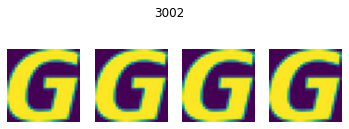

In [76]:
overlap_test_train = extract_overlap_hash_where(test_dataset, train_dataset)
print('Number of overlaps:', len(overlap_test_train.keys()))

In [77]:
def sanitize(dataset_1, dataset_2, labels_1):
    dataset_hash_1 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_1])
    dataset_hash_2 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_2])
    overlap = []  # list of indexes
    for i, hash1 in enumerate(dataset_hash_1):
        duplicates = np.where(dataset_hash_2 == hash1)
        if len(duplicates[0]):
            overlap.append(i)
    return np.delete(dataset_1, overlap, 0), np.delete(labels_1, overlap, None)


In [78]:
test_dataset_sanit, test_labels_sanit = sanitize(test_dataset, train_dataset, test_labels)
print('Overlapping images removed from test_dataset: ', len(test_dataset) - len(test_dataset_sanit))
valid_dataset_sanit, valid_labels_sanit = sanitize(valid_dataset, train_dataset, valid_labels)
print('Overlapping images removed from valid_dataset: ', len(valid_dataset) - len(valid_dataset_sanit))
print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_labels_sanit.shape, valid_labels_sanit.shape)
print('Testing:', test_dataset_sanit.shape, test_labels_sanit.shape)


Overlapping images removed from test_dataset:  1288
Overlapping images removed from valid_dataset:  2063
Training: (200000, 28, 28) (200000,)
Validation: (16937,) (16937,)
Testing: (8712, 28, 28) (8712,)


In [80]:
pickle_file_sanit = '../data/notMNIST_sanit.pickle'

try:
    f = open(pickle_file_sanit, 'wb')
    save = {
        'train_dataset': train_dataset,
        'train_labels': train_labels,
        'valid_dataset': valid_dataset_sanit,
        'valid_labels': valid_labels_sanit,
        'test_dataset': test_dataset_sanit,
        'test_labels': test_labels_sanit,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

statinfo = os.stat(pickle_file_sanit)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 708538375
